<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Decision_Tree_Comapny_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/Company_Data.csv"

In [4]:
data = pd.read_csv(url)

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
#Find the average sales and classifying the categories that are greater than the average sales value
data["sales"]=(data["Sales"]>7.49)*1

In [10]:
data.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1


Converting all the categorical variable to numerical values using Label encoding

In [11]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [12]:
# Encode labels in column 'ShelveLoc', 'Urban	'  & 'US'
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
print(data.head(5))

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  sales  
0         17      1   1      1  
1         10      1   1      1  
2         12      1   1      1  
3         14      1   1      0  
4         13      1   0      0  


Dropping the sales column from the data, since it is the target variable, 'y'

In [13]:
Data=data.drop(columns=['Sales'])

In [14]:
Data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1


Splitting the data into independent and target variables

In [15]:
x=Data.iloc[:,0:10]
y=Data.iloc[:,10]

Checking for the correlation of teh varaibles, using heatmap

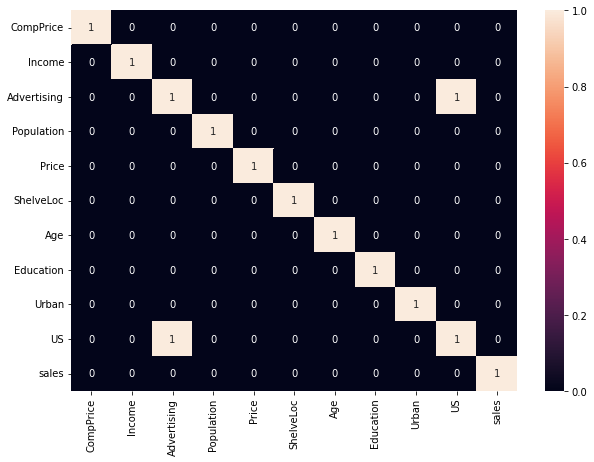

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(Data.corr()>0.6, annot = True)
plt.show()

COrrelation Matrix

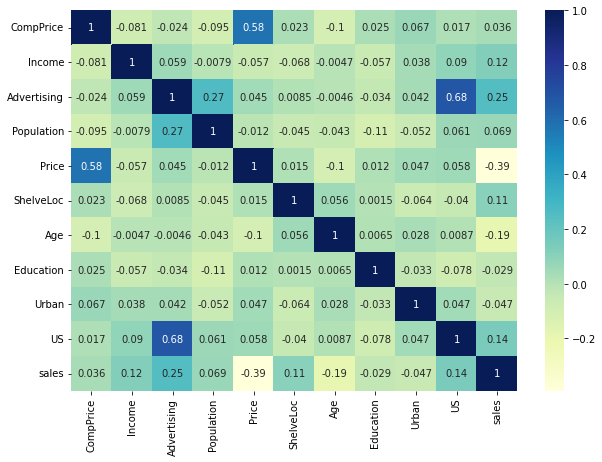

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(Data.corr(),cmap="YlGnBu",annot=True)
plt.show()


Splitting data into training and testing data set, to check the confusion matrix between the test and train data

In [18]:
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor

In [19]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

Creating a Decision tree classifier model with a depth of 3 and fitting the data on the model

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Plot the decision tree

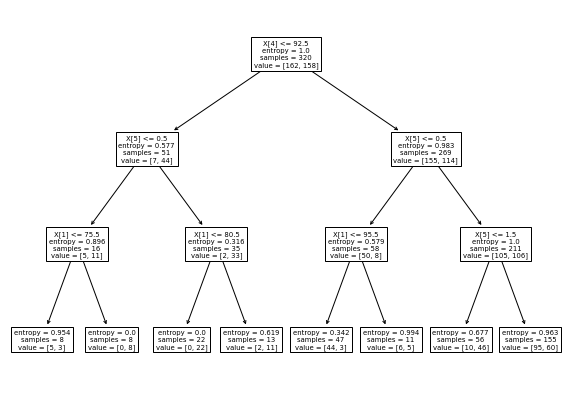

In [21]:
plt.figure(figsize=(10,7))
tree.plot_tree(model);

Visualizing how the data is choosing the root node and how a decision tree classifier is built

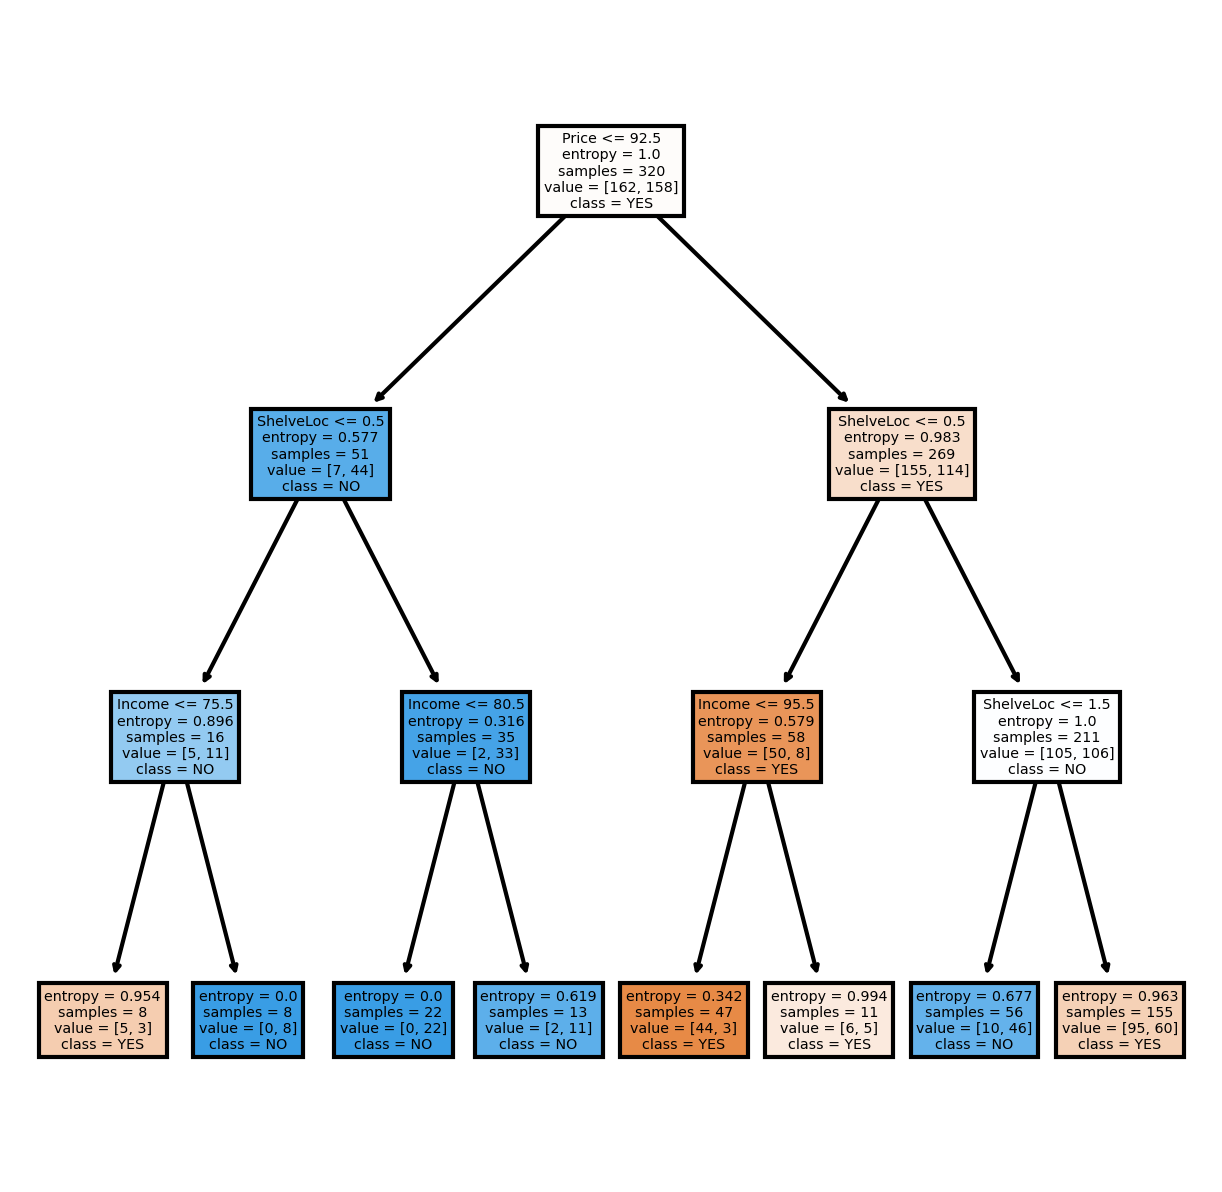

In [22]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

Checking the score for the training data

In [23]:
model.score(x_train, y_train)

0.740625

Predicting on the test data using the built Decision tree classifier model

In [24]:
y_pred = model.predict(x_test)

Identifying the accuracy of the predicted and the Y_test values

In [25]:
np.mean(y_pred==y_test)

0.6875

Evaluation metric - Confusion matrix

In [26]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[36,  3],
       [22, 19]])

Text(0.5, 1.0, 'Accuracy Score: 0.6875')

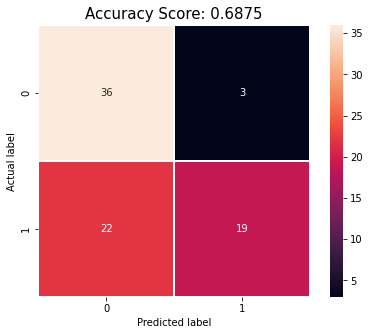

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.92      0.74        39
           1       0.86      0.46      0.60        41

    accuracy                           0.69        80
   macro avg       0.74      0.69      0.67        80
weighted avg       0.75      0.69      0.67        80



Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11

In [29]:
train_accuracy = []
test_accuracy = []

for max_depth in range (1,11):
  model =DecisionTreeClassifier(criterion = 'entropy',max_depth = max_depth, random_state = 20)
  model.fit(x_train,y_train)
  train_accuracy.append(model.score(x_train, y_train))
  test_accuracy.append(model.score(x_test, y_test))

In [30]:
Accuracy = pd.DataFrame({'max_depth':range(1,11),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})

In [31]:
Accuracy

,max_depth,train_accuracy,test_accuracy
0,1,0.621875,0.6000
1,2,0.625000,0.6750
2,3,0.740625,0.6875
3,4,0.768750,0.7375
4,5,0.871875,0.7750
5,6,0.887500,0.7625
6,7,0.906250,0.7000
7,8,0.943750,0.7375
8,9,0.962500,0.8000
9,10,0.975000,0.7750


Visualizing the accuracy graph, based on the max_depth

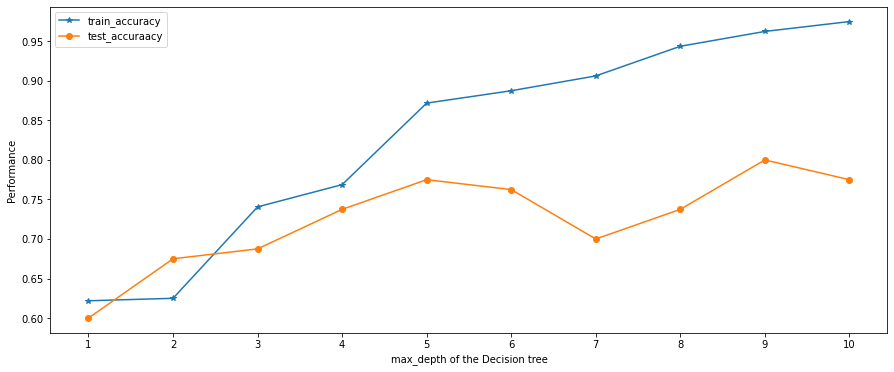

In [33]:
labels =['train_accuracy','test_accuraacy']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(Accuracy['max_depth'],Accuracy['train_accuracy'], marker = '*')
plt.plot(Accuracy['max_depth'], Accuracy['test_accuracy'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the Decision tree')
plt.ylabel('Performance')
plt.show()

Splitting the test and train data with a different train-test split

In [34]:
array = Data.values
array

array([[138,  73,  11, ...,   1,   1,   1],
       [111,  48,  16, ...,   1,   1,   1],
       [113,  35,  10, ...,   1,   1,   1],
       ...,
       [162,  26,  12, ...,   1,   1,   0],
       [100,  79,   7, ...,   1,   1,   0],
       [134,  37,   0, ...,   1,   1,   1]])

In [37]:
X = array[:,0:10]
Y = array[:,10]

Constructing a decision tree regressor model to predict

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

In [42]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, Y_train)

DecisionTreeRegressor()

In [43]:
model1.score(X_test,Y_test)

-0.6056140350877195

Conclusion:
When the maximum depth of the decision tree 9, the accuracy of the classsification algorithm gives 81.25%.
More over, it is clear that the Decision tree classfier gives a good result and Decision tree regresser is not an advisable method to classify the data, since this is not a regression problem